# Dacon

In [1]:
import numpy as np
import pandas as pd
from os import chdir

In [69]:
chdir('C:/Users/user/Desktop/open data')
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test_x.csv', index_col = 0)
submission = pd.read_csv('sample_submission.csv', index_col=0)

In [70]:
print(df_train.shape)
print(df_test.shape)

(45532, 77)
(11383, 76)


In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 77 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QaA         45532 non-null  float64
 1   QaE         45532 non-null  int64  
 2   QbA         45532 non-null  float64
 3   QbE         45532 non-null  int64  
 4   QcA         45532 non-null  float64
 5   QcE         45532 non-null  int64  
 6   QdA         45532 non-null  float64
 7   QdE         45532 non-null  int64  
 8   QeA         45532 non-null  float64
 9   QeE         45532 non-null  int64  
 10  QfA         45532 non-null  float64
 11  QfE         45532 non-null  int64  
 12  QgA         45532 non-null  float64
 13  QgE         45532 non-null  int64  
 14  QhA         45532 non-null  float64
 15  QhE         45532 non-null  int64  
 16  QiA         45532 non-null  float64
 17  QiE         45532 non-null  int64  
 18  QjA         45532 non-null  float64
 19  QjE         45532 non-nul

In [72]:
df_train.columns

Index(['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE',
       'age_group', 'education', 'engnat', 'familysize', 'gender', 'hand',
       'married', 'race', 'religion', 'tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10', 'urban', 'voted', 'wf_01',
       'wf_02', 'wf_03', 'wr_01', 'wr_02', 'wr_03', 'wr_04', 'wr_05', 'wr_06',
       'wr_07', 'wr_08', 'wr_09', 'wr_10', 'wr_11', 'wr_12', 'wr_13'],
      dtype='object')

In [73]:
df_train.voted = df_train.voted - 1

## Data Processing

### target variable

- voted / 2 / 1

In [7]:
df_train['voted'].value_counts()

1    24898
0    20634
Name: voted, dtype: int64

### Features engineering

In [8]:
# Q_A : 질문에 대한 평가, 등간척도
# 1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree
df_train[['QaA','voted']].groupby('QaA').mean()

,voted
QaA,
1.0,0.564892
2.0,0.540892
3.0,0.563033
4.0,0.494825
5.0,0.500437


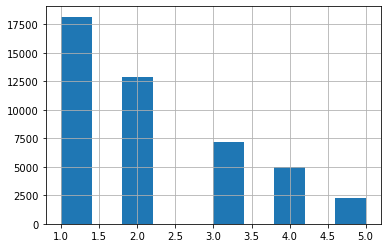

In [9]:
df_train['QaA'].hist()

In [10]:
# Q_E : 질문을 답할 때까지의 시간
df_train[['QaE','voted']].groupby('QaE').mean()

,voted
QaE,
25,1.000000
26,0.600000
27,0.571429
28,1.000000
29,0.500000
...,...
497807,1.000000
571768,0.000000
599190,1.000000


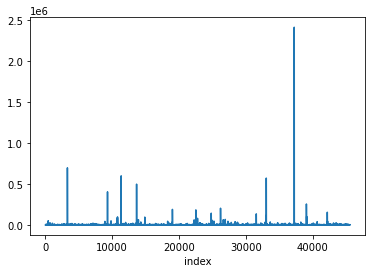

In [11]:
df_train['QaE'].plot()

In [12]:
# age_group : 연령대, str
df_train[['age_group','voted']].groupby('age_group').mean()

,voted
age_group,
+70s,0.263830
10s,0.837214
20s,0.469671
30s,0.411179
40s,0.357949
50s,0.329872
60s,0.271357


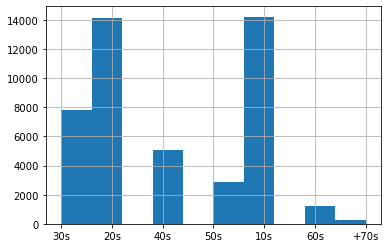

In [13]:
df_train['age_group'].hist()

In [14]:
# education : 교육수준, str
# engnat : 모국어가 영어인가, 0이 결측치
# familysize : 형제자매 수
# gender : 성별
# hand : 필기하는 손, str, 0이 결측치
# married : 혼인상태, str
# race : 인종
# religion : 종교

In [15]:
# tp : 순서형변수
df_train[['tp01','voted']].groupby('tp01').mean()

,voted
tp01,
0,0.513694
1,0.527402
2,0.556811
3,0.569339
4,0.546610
5,0.544195
6,0.578878
7,0.547703


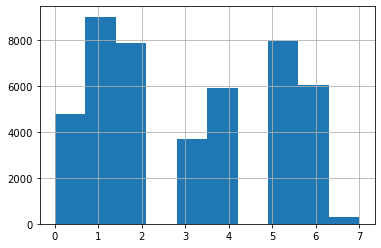

In [16]:
df_train['tp01'].hist()

In [17]:
# urban : 유년기 거주 구역, str, 0이 결측치
# wr : yes/no
# wf : yes/no

- 마키아벨리니즘

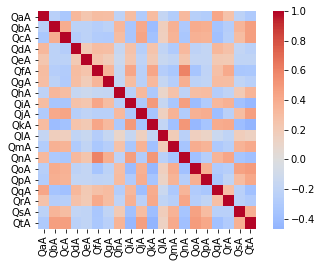

In [74]:
import seaborn as sns

Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

Answers_time_only = ['QaE', 'QbE', 'QcE', 'QdE', 'QeE',
             'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 
             'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 
             'QpE', 'QqE', 'QrE', 'QsE', 'QtE']

correlations = df_train[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [75]:
#data reverse
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    df_train[flip] = 6 - df_train[flip]

#secret data reverse
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    df_train[flip] = 6 - df_train[flip]

df_train['Mach_score'] = df_train[Answers].mean(axis = 1)

In [76]:
#data reverse
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    df_test[flip] = 6 - df_test[flip]
    
#secret data reverse
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    df_test[flip] = 6 - df_test[flip]

df_test['Mach_score'] = df_test[Answers].mean(axis = 1)

- 피처 변수 정규화

In [77]:
log_Answer_time = df_train[Answers_time_only].copy()
log_Answer_time[Answers_time_only] = np.log1p(df_train[Answers_time_only])
df_train[Answers_time_only] = log_Answer_time

In [78]:
log_Answer_time_t = df_test[Answers_time_only].copy()
log_Answer_time_t[Answers_time_only] = np.log1p(df_test[Answers_time_only])
df_test[Answers_time_only] = log_Answer_time_t

- 상관관계

In [79]:
corr = df_train.corr()
corr

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
QaA,1.000000,-0.085087,0.241980,-0.016087,0.309438,-0.059760,0.313172,-0.071716,0.211496,-0.026677,...,0.031038,0.042923,0.026785,-0.004128,0.027163,0.015936,-0.000456,0.014155,0.013171,0.528127
QaE,-0.085087,1.000000,-0.144973,0.286571,-0.091709,0.302246,-0.051990,0.302425,-0.068843,0.296531,...,-0.021223,-0.025150,-0.026110,0.000016,-0.025206,-0.008088,-0.005309,0.003090,-0.033470,-0.175849
QbA,0.241980,-0.144973,1.000000,-0.148253,0.385936,-0.160566,0.207616,-0.137322,0.197120,-0.131674,...,-0.021135,0.002244,-0.000924,-0.014666,-0.006372,-0.024496,-0.012131,-0.024029,0.000519,0.624758
QbE,-0.016087,0.286571,-0.148253,1.000000,-0.055540,0.327507,-0.039967,0.322852,-0.060678,0.329284,...,-0.053183,-0.054043,-0.039699,-0.004466,-0.052800,-0.019549,-0.066489,-0.010830,-0.052560,-0.128211
QcA,0.309438,-0.091709,0.385936,-0.055540,1.000000,-0.157931,0.245332,-0.100354,0.194034,-0.078693,...,0.015403,0.040961,0.015864,-0.016094,0.028129,0.007025,0.026792,0.004300,0.003499,0.614702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wr_10,0.015936,-0.008088,-0.024496,-0.019549,0.007025,-0.042319,0.047415,-0.054285,0.041892,-0.041566,...,0.453839,0.081429,0.579492,0.465421,0.049036,1.000000,0.133251,0.497165,0.431927,0.006857
wr_11,-0.000456,-0.005309,-0.012131,-0.066489,0.026792,-0.077301,0.050704,-0.104013,0.072944,-0.097997,...,0.222746,0.298060,0.143939,0.068122,0.348387,0.133251,1.000000,0.129087,0.170115,0.020153
wr_12,0.014155,0.003090,-0.024029,-0.010830,0.004300,-0.024696,0.043512,-0.041180,0.034397,-0.024056,...,0.390937,0.084020,0.474846,0.418815,0.050239,0.497165,0.129087,1.000000,0.404597,0.001414
wr_13,0.013171,-0.033470,0.000519,-0.052560,0.003499,-0.083246,0.067613,-0.112407,0.063945,-0.091468,...,0.479021,0.103997,0.447438,0.370145,0.071570,0.431927,0.170115,0.404597,1.000000,0.016788


- 결측치 처리

In [80]:
a = df_train.isnull().sum()
a[a != 0]

Series([], dtype: int64)

In [81]:
b = df_test.isnull().sum()
b[b != 0]

Series([], dtype: int64)

- 피처 변수 속성 확인

In [85]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45532 entries, 0 to 45531
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QaA          45532 non-null  float64
 1   QaE          45532 non-null  float64
 2   QbA          45532 non-null  float64
 3   QbE          45532 non-null  float64
 4   QcA          45532 non-null  float64
 5   QcE          45532 non-null  float64
 6   QdA          45532 non-null  float64
 7   QdE          45532 non-null  float64
 8   QeA          45532 non-null  float64
 9   QeE          45532 non-null  float64
 10  QfA          45532 non-null  float64
 11  QfE          45532 non-null  float64
 12  QgA          45532 non-null  float64
 13  QgE          45532 non-null  float64
 14  QhA          45532 non-null  float64
 15  QhE          45532 non-null  float64
 16  QiA          45532 non-null  float64
 17  QiE          45532 non-null  float64
 18  QjA          45532 non-null  float64
 19  QjE 

In [83]:
df_train['education'] = df_train['education'].apply(str)
df_train['hand'] = df_train['hand'].apply(str)
df_train['married'] = df_train['married'].apply(str)
df_train['urban'] = df_train['urban'].apply(str)

df_test['education'] = df_test['education'].apply(str)
df_test['hand'] = df_test['hand'].apply(str)
df_test['married'] = df_test['married'].apply(str)
df_test['urban'] = df_test['urban'].apply(str)

- 순서형 라벨인코딩

In [86]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df_train['gender_code']=label.fit_transform(df_train['gender'])
df_train['age_group']=label.fit_transform(df_train['age_group'])
df_train['education']=label.fit_transform(df_train['education'])
df_train['tp01'] = label.fit_transform(df_train['tp01'])
df_train['tp02'] = label.fit_transform(df_train['tp02'])
df_train['tp03'] = label.fit_transform(df_train['tp03'])
df_train['tp04'] = label.fit_transform(df_train['tp04'])
df_train['tp05'] = label.fit_transform(df_train['tp05'])
df_train['tp06'] = label.fit_transform(df_train['tp06'])
df_train['tp07'] = label.fit_transform(df_train['tp07'])
df_train['tp08'] = label.fit_transform(df_train['tp08'])
df_train['tp09'] = label.fit_transform(df_train['tp09'])
df_train['tp10'] = label.fit_transform(df_train['tp10'])

df_test['gender_code']=label.fit_transform(df_test['gender'])
df_test['age_group']=label.fit_transform(df_test['age_group'])
df_test['education']=label.fit_transform(df_test['education'])
df_test['tp01']=label.fit_transform(df_test['tp01'])
df_test['tp02']=label.fit_transform(df_test['tp02'])
df_test['tp03']=label.fit_transform(df_test['tp03'])
df_test['tp04']=label.fit_transform(df_test['tp04'])
df_test['tp05']=label.fit_transform(df_test['tp05'])
df_test['tp06']=label.fit_transform(df_test['tp06'])
df_test['tp07']=label.fit_transform(df_test['tp07'])
df_test['tp08']=label.fit_transform(df_test['tp08'])
df_test['tp09']=label.fit_transform(df_test['tp09'])
df_test['tp10']=label.fit_transform(df_test['tp10'])

- 더미화

In [87]:
y=df_train['voted']
df_train=df_train.loc[:,df_train.columns != 'voted']

df_full = pd.concat([df_train, df_test])
df_full = pd.get_dummies(df_full) 
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)  

In [88]:
print(df_full.shape)
print(df_train.shape)
print(df_test.shape)

(56915, 105)
(45532, 105)
(11383, 105)


## Modeling

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

y_target = y
X_features = df_train
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=0)

In [90]:
def rmse(predictions, targets) :
    return np.sqrt(((predictions - targets) ** 2).mean())

LogisticRegression

In [91]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

print('정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Root Mean Squared Error:',rmse(y_pred,y_test))

정확도 : 0.6782
Root Mean Squared Error: 0.5673097413173948


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Root Mean Squared Error :',rmse(y_pred,y_test))

정확도 : 0.6088
Root Mean Squared Error : 0.6254898157508193


In [93]:
from sklearn.model_selection import GridSearchCV

skfold = StratifiedKFold(n_splits=2)

params = {'max_depth' : [6,8,10,12,16,20,24],
          'min_samples_split' : [12,16,20,24]}
grid_cv = GridSearchCV(dt, param_grid=params, scoring='accuracy', cv=skfold)
grid_cv.fit(X_train, y_train)
print('GridSeachCV 최고 평균 정확도 : {0:.4F}'.format(grid_cv.best_score_))
print('GridSeachCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

GridSeachCV 최고 평균 정확도 : 0.6822
GridSeachCV 최적 하이퍼 파라미터 :  {'max_depth': 6, 'min_samples_split': 24}


In [94]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)

print(pred1)
print(y_test)
print('정확도 : {0:.4f}'.format(accuracy_score(y_test, pred1)))
print('Root Mean Squared Error :', rmse(pred1,y_test))

[1 1 0 ... 1 1 1]
index
21964    1
19947    1
15906    1
37973    1
25088    1
        ..
20957    0
1180     0
5622     1
32207    1
15244    1
Name: voted, Length: 9107, dtype: int64
정확도 : 0.6924
Root Mean Squared Error : 0.5545859796932266


RandomForestClassifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=11)
rf.fit(X=X_train, y=y_train)
y_pred = rf.predict(X_test)

print('정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Root Mean Squared Error:',rmse(y_pred,y_test))

정확도 : 0.6970
Root Mean Squared Error: 0.5504123652534268


In [29]:
# from sklearn.model_selection import GridSearchCV

# skfold = StratifiedKFold(n_splits=2)

# params = {'max_depth' : [6,8,10,12,16,20,24],
#           'min_samples_split' : [12,16,20,24]}
# grid_cv = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=skfold)
# grid_cv.fit(X_train, y_train)
# print('GridSeachCV 최고 평균 정확도 : {0:.4F}'.format(grid_cv.best_score_))
# print('GridSeachCV 최적 하이퍼 파라미터 : ', grid_cv.best_params_)

In [30]:
# best_df_clf = grid_cv.best_estimator_
# pred1 = best_df_clf.predict(X_test)

# print('정확도 : {0:.4f}'.format(accuracy_score(y_test, pred1)))
# print('Root Mean Squared Error :',rmse(pred1,y_test))

GradientBoostingClassifier

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X=X_train, y=y_train)
y_pred = gb.predict(X_test)
y_true = y_test

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('rmse= ',rmse)
print("gradientboosting 훈련 세트 점수 :{:.4f}".format(gb.score(X_train, y_train)))
print("gradientboosting 테스트 세트 점수 :{:.4f}".format(gb.score(X_test, y_test)))

rmse=  0.5457040466731
gradientboosting 훈련 세트 점수 :0.7031
gradientboosting 테스트 세트 점수 :0.7022


XGBoostingClassifier

In [97]:
import xgboost as xgb

d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_test, label=y_test)
#d_test = xgb.DMatrix(y_target.values)

In [100]:
params = {
        'objective':'binary:logistic',
        'max_depth':5,
        'learning_rate':0.01, 
        'eval_metric':'auc',
        'min_child_weight':8,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'seed':29,
#         'reg_lambda':1,
        'reg_alpha':0,
        'gamma':1,
        'scale_pos_weight':1,
        'n_estimators': 100,
        'nthread':-1
}

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
nrounds=10000  
model_xgb = xgb.train(params, d_train, nrounds, watchlist, early_stopping_rounds=50, 
                           maximize=True, verbose_eval=10)

[23:00:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.74832	valid-auc:0.74154
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[10]	train-auc:0.76772	valid-auc:0.76419
[20]	train-auc:0.76843	valid-auc:0.76433
[30]	train-auc:0.76884	valid-auc:0.76494
[40]	train-auc:0.76982	valid-auc:0.76562
[50]	train-auc:0.77041	valid-auc:0.76628
[60]	train-auc:0.77106	valid-auc:0.76669
[70]	train-auc:0.77160	valid-auc:0.76714
[80]	train-auc:0.77206	valid-auc:0.76724
[90]	train-auc:0.77258	valid-auc:0.76739
[100]	train-auc:0.77306	valid-auc:0.76765
[110]	train-auc: